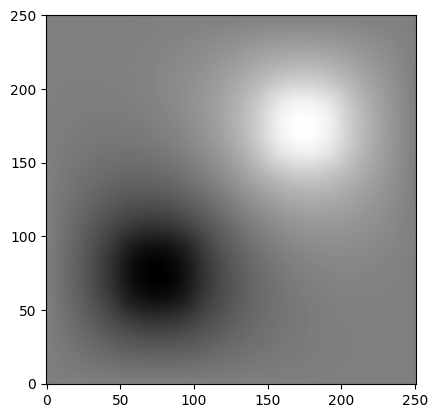

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 250         # Grid squares on a side
V = 0.0         # Voltage at top wall
L = 1.0         # Side length of box
target = 3e-4   # Target accuracy
epsilon_0 = 8.85e-12
a = L / float(M) # grid point spacing

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = np.empty([M+1,M+1],float)

# Create surface charge density array
rho_values = [-1.0, 1.0]  # Surface charge density
charge_width = [0.2, 0.2] # Width of the charges (assuming squares)
charge_boundaries = [[0.2, 0.2], [0.6, 0.6]] # Position of origin of the charges
rho = np.zeros([M+1,M+1], float)
for i in range(len(rho_values)):
    #
    # Complete in-class. Define rho (source/sink term)
    # Fill in the charged squares with the appropriate density
    #
    rho_x = int(charge_boundaries[i][0] * M)
    rho_y = int(charge_boundaries[i][1] * M)
    rho_width = int(charge_width[i] * M)
    rho[rho_x:rho_x+rho_width, rho_y:rho_y+rho_width] = rho_values[i]

# Main loop
delta = 1.0
iteration = 0
while delta>target:
    # Calculate new values of the potential
    phiprime[0, :] = phi[0, :]
    phiprime[-1, :] = phi[-1, :]
    phiprime[:, 0] = phi[:, 0]
    phiprime[:, -1] = phi[:, -1]
    phiprime[1:-1,1:-1] = (phi[2:, 1:-1] + phi[:-2, 1:-1] + phi[1:-1, :-2] + phi[1:-1, 2:]) / \
        4.0 + a ** 2 / (4 * epsilon_0) * rho[1:-1, 1:-1]

    # Calculate maximum fractional difference from old values
    delta = np.abs(phi-phiprime)
    nonzero = phi > 0
    if nonzero.any():
        delta = np.max(delta[nonzero])
    else:
        delta = 1.0
    # if iteration % 10 == 0:
    #     print("Iteration %3d: max. residual = %12.6g" % (iteration, delta))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    iteration += 1

# Make a plot
plt.imshow(phi, origin="lower")
plt.gray()
plt.show()
